# Class Activation Map (CAM)

### [Visão Computacional](https://denmartins.github.io/teaching/2025-visao-computacional)
### [Prof. Dr. Denis Mayr Lima Martins](https://denmartins.github.io/)

## Modelos Opacos x Modelos Transparentes
---

<div style='align: left; text-align:center;'>
    <img src='https://www.researchgate.net/profile/Javier-Del-Ser/publication/338184751/figure/fig7/AS:841880166223884@1577731281844/Trade-off-between-model-interpretability-and-performance-and-a-representation-of-the.png' style="width:500px;"/>
    <span style='display:block;'>Trade-off interpretabilidade versus capacidade do modelo. Fonte: <a href="https://arxiv.org/pdf/1910.10045" target="_blank"> Arrieta, Alejandro Barredo, et al. "Explainable Artificial Intelligence (XAI): Concepts, taxonomies, opportunities and challenges toward responsible AI." Information fusion 58 (2020): 82-115</a>.</span>
    <br/>
</div>

## A Necessidade de Explicabilidade
---

*   **CNNs como "Caixas Pretas"**: Modelos de Deep Learning alcançam alta performance, mas suas previsões são difíceis de interpretar.
*   **Interpretabilidade e Explicabilidade (XAI)**: O campo de [Explainable AI (XAI)](https://arxiv.org/pdf/1910.10045) busca desvendar o processo de tomada de decisão desses modelos complexos.
*   **Confiança e Transparência**: A falta de transparência reduz a confiança, sendo crucial verificar se o modelo está focando nas regiões corretas da imagem.

<div style='align: left; text-align:center;'>
<img src='https://blogger.googleusercontent.com/img/b/R29vZ2xl/AVvXsEhqXTzfpMKeTG0eS0uo8nYDMFHzzP8BgLnfuUqzzX_XrpPzLhtniS8tml79v000O_3P2wLp5NlkdlJ8R9xfOmdisrUveRR3UvHMRp4RW10NWj4ut-2h2WYGmk7uoXNs9kxglQHFM_j1TcKS8L27e4iuOAMmi6-8XM2S3QxXjN3TlMZru_5XxvS3Ialh2A/s1282/xai%20explain.png' style="width:500px;"/>
    <span style='display:block;'>Interpretabilidade em Modelos. Fonte: <a href="https://deeplearningofpython.blogspot.com/2023/05/XAImodels-Interpretability-posthocexplainability.html" target="_blank"> Deep Learning of Python</a>.</span>

</div>

## Falta de Interpretabilidade em CNNs
---

*   **Perda da Correspondência Espacial**: O uso tradicional de camadas totalmente conectadas (FC) após as convoluções "achata" os mapas de características, agindo como uma caixa preta e perdendo a correspondência direta entre a localização espacial da característica e o *output* final.
*   **Localização Discriminativa**: A capacidade da CNN de localizar objetos (inerente às camadas convolucionais) é perdida antes da classificação final.


<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/slide3-1-768x235.png' style="width:700px;"/>
    <span style='display:block;'>Perda de localização por "achatamento" para camadas densas. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>


## A Necessidade de Explicabilidade
---

<div style='align: left; text-align:center;'>
<img src="https://www.mdpi.com/sensors/sensors-21-05813/article_deploy/html/images/sensors-21-05813-g009-550.jpg" width="500px"/>
    <span style="display:block;">Interpretabilidade em CNNs. Fonte: <a href="https://www.mdpi.com/1424-8220/21/17/5813" target="_blank"> Umair, Muhammad, et al. "Detection of COVID-19 using transfer learning and Grad-CAM visualization on indigenously collected X-ray dataset." Sensors 21.17 (2021): 5813</a>.</span>

</div>

## Falta de Interpretabilidade em CNNs
---

*   **Filtros de Camadas Iniciais**: Filtros próximos à entrada detectam características de baixo nível (bordas, linhas).
*   **Filtros de Camadas Profundas**: Em camadas mais profundas, as *feature maps* (mapas de características) combinam padrões, podendo corresponder a objetos ou conceitos.


<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/slide2-1-768x341.png' style="width:550px;"/>
    <span style='display:block;'>Exemplo de ativações de uma rede que reconhece pessoas e cães. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>

## Class Activation Maps (CAM)
---

*   **O que é CAM?**: Uma técnica para gerar mapas de ativação que indicam as regiões discriminativas de uma imagem usadas pela CNN para identificar uma categoria específica.
*   **Explicabilidade Visual**: O resultado é um mapa de calor (heatmap) que visualiza onde a CNN está "olhando" ao fazer uma previsão.
*   O CAM permite a localização de objetos (desenhar uma caixa delimitadora) usando apenas **rótulos de nível de imagem** (classificação), sem a necessidade de anotações de caixas delimitadoras (bounding boxes) durante o treinamento.
*   **Proposta Original**: O método foi introduzido por [Zhou et al. em 2016](https://arxiv.org/pdf/1512.04150).

## Global Average Pooling (GAP)
---

*   **Restrição Arquitetural**: O método CAM original só pode ser aplicado em modelos com uma arquitetura específica.
*   **Estrutura Obrigatória**: O modelo deve ter uma camada de *Global Average Pooling* (GAP) imediatamente após a última camada convolucional, seguida diretamente pela camada de classificação (Softmax ou FC).
*   **Alternativa ao Achamento**: Essa estrutura evita as camadas FC densas que agem como caixas pretas entre o mapa de características e o *output*.


<div style='align: left; text-align:center;'>
    <img src='http://cnnlocalization.csail.mit.edu/framework.jpg' style="width:500px;"/>
    <span style='display:block;'>CAM via GAP. Fonte: <a href="http://cnnlocalization.csail.mit.edu/" target="_blank"> Zhou et al. 2016</a>.</span>
</div>


## Global Average Pooling (GAP): Funcionamento
---

*   **Operação GAP**: A camada GAP calcula a média espacial (média de todos os pixels) de cada mapa de características na última camada convolucional.
*   **Redução Dimensional**: Transforma cada mapa de característica $k$ de dimensão $H \times W$ em um único valor escalar $F_k$.


<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/slide5-1-1024x255.png' style="width:800px;"/>
    <span style='display:block;'>Operação GAP. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>


## GAP versus Global Max Pooling (GMP)
---

*  GAP tende a encorajar a rede a identificar a *extensão completa* de um objeto, pois a média se beneficia de todas as ativações positivas. 
* GMP, por outro lado, pode se contentar em identificar apenas o ponto mais discriminativo.


<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:50%;">

<img src='https://iq.opengenus.org/content/images/2023/06/Max-Pooling.png' style="width:500px;"/>

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:50%">

<img src='https://iq.opengenus.org/content/images/2023/06/Avg-Pooling.png' style="width:500px;"/>

</td>
</tr>
</table>




## Comparação Flatten versus GAP
---

*  Flatten perde informação espacial.
*  GAP preserva a informação espacial. Para um tensor $(8, 10, 64)$, GAP produz um tensor $(1, 1, 64)$.


<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:35%;">

<img src='https://iq.opengenus.org/content/images/2023/06/Flatten_layer-1.png' style="height:300px;"/>

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:65%">

<img src='https://tyami.github.io/assets/images/post/DL/2020-10-27-CNN-visualization-Grad-CAM/2020-10-27-cnn-visualization-grad-cam-6-gap.png' style="width:100%;"/>

</td>
</tr>
</table>




## Global Average Pooling (GAP)
---

<div style='align: left; text-align:center;'>
    <img src='https://tyami.github.io/assets/images/post/DL/2020-10-27-CNN-visualization-Grad-CAM/2020-10-27-cnn-visualization-grad-cam-9-cam-1.png' style="width:500px;"/>
    <span style='display:block;'>Operação GAP. Fonte: <a href="https://tyami.github.io/deep%20learning/CNN-visualization-Grad-CAM/" target="_blank"> Taeyang Yang</a>.</span>
</div>


## Global Average Pooling (GAP)
---

<div style='align: left; text-align:center;'>
    <img src='https://tyami.github.io/assets/images/post/DL/2020-10-27-CNN-visualization-Grad-CAM/2020-10-27-cnn-visualization-grad-cam-10-cam-2.png' style="width:500px;"/>
    <span style='display:block;'>Exemplo de CAM. Fonte: <a href="https://tyami.github.io/deep%20learning/CNN-visualization-Grad-CAM/" target="_blank"> Taeyang Yang</a>.</span>
</div>


## Global Average Pooling (GAP): Classificação
---

*   **Entrada para Classificação**: O vetor resultante dos valores $F_k$ é então alimentado diretamente na camada de classificação (Softmax/FC).
*   **Importância do Conceito**: O peso $w_k^c$ representa a importância do mapa de características $k$ (ou "conceito" $k$) para a previsão da classe $c$.

<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/slide6-768x166.png' style="width:800px;"/>
    <span style='display:block;'>Operação GAP. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>


##  A Equação do Class Activation Map
---

*  O CAM Map $M_c$ para a classe $c$ em um local $(x,y)$ é definido pela soma ponderada das ativações de todos os mapas de características:

$$M_c(x,y)=\sum_k w_k^c f_k(x,y)$$

*   **Variáveis da Fórmula**:
    *   $M_c(x,y)$: Class Activation Map, o valor de importância no local $(x,y)$ para a classe $c$.
    *   $w_k^c$: Peso da conexão da camada FC, representando a importância do $k$-ésimo mapa de características para a classe $c$.
    *   $f_k(x,y)$: Ativação do $k$-ésimo mapa de características na última camada convolucional, na posição $(x,y)$.
    *   $k$: Índice sobre todos os mapas de características da última camada convolucional.
*   **Importância do Conceito**: O peso $w_k^c$ representa a importância do mapa de características $k$ (ou "conceito" $k$) para a previsão da classe $c$.

## CAM: Exemplo
---

* **Cálculo do CAM**: Realizar a soma ponderada das features pelo peso da classe.
*   **Normalização e Redimensionamento**: O CAM resultante é de baixa resolução (e.g., 7x7) e deve ser normalizado (para mapeamento de cores) e redimensionado (upsampled) para as dimensões originais da imagem.
*   **Geração do Mapa de Calor**: Usar uma paleta de cores (e.g., `jet`) para criar o mapa de calor.

<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/sizebyside-1024x348.png' style="width:600px;"/>
    <span style='display:block;'>Exemplo de CAM. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>


## CAM: Exemplo
---

*   **Sobreposição**: A sobreposição da imagem original com o mapa de calor visualiza as regiões discriminativas.
* Note que o CAM foca apenas nas ativações da última camada convolucional, que pode ser mais propensa às características de alto nível, mas ignora as representações localizadas de camadas mais rasas.

<div style='align: left; text-align:center;'>
    <img src='https://johfischer.com/wp-content/uploads/2022/01/superimpose-768x538.png' style="width:350px;"/>
    <span style='display:block;'>Exemplo de CAM. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</div>


## Weakly-supervised object localization (WSOL)
---

<center>
<table style="width:100%;border:none;">
<tr>
<td style="vertical-align:middle;text-align:left;border:none;width:60%;">


*   **WSOL**: O CAM foi originalmente proposto como uma forma de realizar Localização de Objeto Supervisionada Fracamente (WSOL).
*   **Fluxo de Trabalho de Localização**: Após gerar o mapa de calor, uma técnica de limiarização simples é usada: segmentar regiões com valor acima de 20% do valor máximo do CAM.
*   **Geração da Bounding Box**: A caixa delimitadora é desenhada cobrindo o maior componente conectado na região segmentada, localizando o objeto discriminativo.

</td>
<td style="vertical-align:middle;text-align:center;border:none;width:40%">
    
<img src='https://johfischer.com/wp-content/uploads/2022/01/detection-768x538.png' style="width:100%;"/>
    <span style='display:block;'>Bounding Box via CAM. Fonte: <a href="https://johfischer.com/2022/01/27/class-activation-maps/" target="_blank"> Joh Fischer</a>.</span>
</td>
</tr>
</table>
</center>


## CAM: Implementação Pytorch
---
Download da imagem de entrada [aqui](https://unsplash.com/photos/75715CVEJhI/download?ixid=M3wxMjA3fDB8MXxzZWFyY2h8M3x8Y2F0fGVufDB8fHx8MTc2MzMzNDg2Mnww&force=true&w=640) | Créditos: https://unsplash.com/@sadmax

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

img = Image.open("amber-kipp-75715CVEJhI-unsplash.jpg")
plt.figure(figsize=(4,4))
plt.imshow(img)
plt.show()


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.2.5 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.11/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.11/site-p

AttributeError: _ARRAY_API not found

ImportError: numpy.core.multiarray failed to import

In [2]:
import torch
import torch.nn.functional as F
import torchvision.models as models
import matplotlib.pyplot as plt
from torchvision import transforms
import numpy as np



# O ResNet é já contém a estrutura GAP antes de FC.
model = models.resnet18(weights=models.ResNet18_Weights.IMAGENET1K_V1)
model.eval()

# Armazenar ativações da última camada convolucional ('layer4')
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook

# Registrar o hook na camada alvo (layer4)
model.layer4.register_forward_hook(get_activation('final_conv'))

In [3]:
# Define transformações no padrão da ResNet (224x224)
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406], 
        std=[0.229, 0.224, 0.225])
])

transformada_img = preprocess(img)

# Adiciona dimensão de batch
model_img = transformada_img.unsqueeze(0)
print(model_img.shape)

torch.Size([1, 3, 224, 224])


In [4]:
# Faz o forward pass
outputs = model(model_img)
probs = F.softmax(outputs, dim=1)
class_idx = torch.argmax(probs).item()

# Gera a saída do modelo
output_shape = model(transformada_img.unsqueeze(0)).shape

print(f"Classe Prevista: {class_idx}") 

Classe Prevista: 282


In [5]:
# Extrai Feature Maps
conv_layer_output = activation["final_conv"]
conv_layer_output = conv_layer_output.squeeze(0)

# Recuperar Pesos da Camada FC
fc_weights = model.fc.weight
cat_class_idx = class_idx  # Índice da classe 'cat' na ResNet-18
# Isola os Pesos para a Classe Prevista
cat_fc_weights = fc_weights[cat_class_idx].unsqueeze(1).unsqueeze(1)

# Computa a soma ponderada para gerar o CAM
final_conv_layer_output = cat_fc_weights * conv_layer_output
class_activation_map = final_conv_layer_output.sum(0)

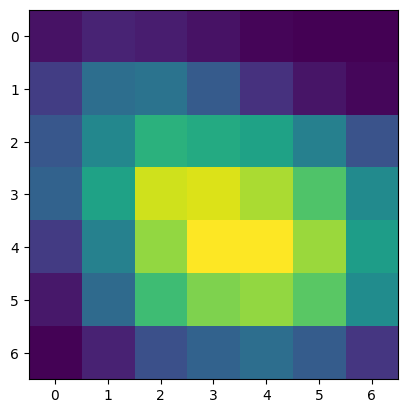

In [6]:
plt.imshow(class_activation_map.to("cpu").detach().numpy())
plt.show()

In [7]:
# Faz o resize do CAM para o tamanho da imagem de entrada
cam_resized = F.interpolate(
    class_activation_map.unsqueeze(0).unsqueeze(0),
      size=tuple(model_img.shape[-2:]), 
      mode='bilinear', 
      align_corners=False)

# Converte CAM para NumPy array
cam_np = cam_resized.squeeze().cpu().detach().numpy()
cam_expanded = np.expand_dims(cam_np, axis=2)

# Converte imagem de entrada para NumPy array
img_np = np.array(img.resize((224,224)))

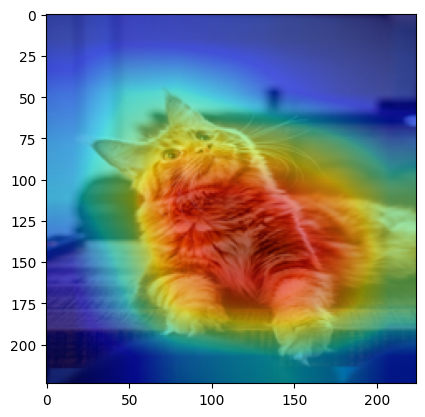

In [8]:
# Mostra CAM + Imagem
plt.imshow(img_np)
plt.imshow(cam_expanded, alpha=0.5, cmap='jet')
plt.show()

O cálculo é a implementação direta da fórmula $M_c(x,y)=\sum_k w_k^c f_k(x,y)$. O redimensionamento é crucial porque os mapas de características são menores do que a imagem original. Uma vez redimensionado, aplicamos um *colormap* de alto contraste como `jet` (cores quentes para importância) e o misturamos com a imagem de entrada.

## CAM: Limitações
---

*   **Restrição de Arquitetura**: A principal limitação é a exigência de ter GAP seguido diretamente pelo Softmax, o que força modificações arquiteturais em modelos que não o possuem (e.g., AlexNet original ou VGG).
*   **Necessidade de Re-treinamento/Ajuste Fino**: Se um modelo popular não se adequar à arquitetura CAM, ele deve ser modificado (removendo camadas FC) e então ajustado (*fine-tuning*).
*   **Baixa Resolução**: O mapa de calor é inicialmente gerado na baixa resolução dos feature maps da última convolução (e.g., 7x7 ou 14x14).
*   **Dependência da Última Camada**: O CAM foca apenas nas ativações da última camada convolucional, que pode ser mais propensa a características de alto nível, mas ignora as representações localizadas de camadas mais rasas.


## Evolução e Outras Abordagens: Grad-CAM
---

*   **Grad-CAM (Generalização)**: O [Grad-CAM (Gradient-weighted Class Activation Mapping)](https://arxiv.org/pdf/1610.02391) foi proposto para superar essa restrição, tornando a localização visual aplicável a *qualquer* arquitetura de CNN.
*   Em vez de usar os pesos $w_k^c$ da camada FC (como no CAM), o Grad-CAM usa os gradientes da pontuação da classe alvo em relação aos feature maps da última convolução para calcular os coeficientes de importância $\alpha_k^c$.

<div style='align: left; text-align:center;'>
    <img src='https://adataodyssey.com/wp-content/uploads/2025/01/relu_and_interpolation-1024x430.png' style="width:450px;"/>
    <span style='display:block;'>Exemplo de Grad-CAM. Fonte: <a href="https://adataodyssey.com/grad-cam/" target="_blank"> A Data Odyssey</a>.</span>
</div>


## Evolução e Outras Abordagens: Grad-CAM++
---

**Grad-CAM++**: Uma melhoria do Grad-CAM que calcula uma média ponderada *verdadeira* dos gradientes, oferecendo melhores explicações visuais, especialmente em imagens com múltiplas ocorrências do mesmo objeto.
*   **Métodos Sem Gradiente (Gradient-Free)**: Surgiram métodos que eliminam a dependência de gradientes para evitar problemas como saturação de gradiente.
*   **Score-CAM**: Utiliza o score de forward pass de cada mapa de característica para determinar sua importância, superando as questões de gradiente.
*   **Recipro-CAM**: Um método mais recente, considerado *state-of-the-art* em eficiência computacional e precisão em certas métricas (ADCC).



<div style='align: left; text-align:center;'>
    <img src='https://miro.medium.com/v2/resize:fit:720/format:webp/1*DbDnt7eVXcv07jZgc4hBrw.png' style="width:500px;"/>
    <span style='display:block;'>Exemplo de Grad-CAM. Fonte: <a href="https://www.kaggle.com/code/tanishqsardana/cam-gradcam-and-gradcam/notebook" target="_blank"> Tanishq Sardana</a>.</span>
</div>


## Conclusão
---

*   **Fundamento de XAI**: CAM é um método pioneiro e eficaz para visualizar as decisões de classificação em CNNs.
*   **Interpretabilidade por Design**: Explora uma arquitetura de rede específica (GAP) que mantém a capacidade de localização.
*   **Localização Poderosa**: Permite a localização de objetos (WSOL) com alta precisão, utilizando apenas rótulos de nível de imagem.
*   **Insight em Pesos**: Liga diretamente a importância do conceito (pesos FC) com a presença espacial (feature maps).
*   **Evolução**: Embora limitado arquiteturalmente, ele pavimentou o caminho para métodos mais flexíveis e generalizados como Grad-CAM.


## Material Adicional
---

* [Class Activation Mapping (CAM): Better Interpretability in Deep Learning Models](https://zilliz.com/learn/class-activation-mapping-CAM)
* [Implementation of Class Activation Map (CAM) with PyTorch](https://zilliz.com/learn/class-activation-mapping-CAM)
* [Building Blocks of Interpretability](https://distill.pub/2018/building-blocks/)
* [Understanding Class Activation Maps (CAMs) for Deep Learning Interpretability](https://youtu.be/WX750egxeck)

## Tarefa 1: Geração e Visualização do CAM
---

Gere CAM em um modelo popular (exemplo, VGG16) para localizar a região discriminativa que justifica a previsão de uma classe ImageNet.


**Instruções Passo a Passo**

1.  **Configuração e Imports:** Importar bibliotecas essenciais (`torch`, `torchvision`, `numpy`, `cv2`, `matplotlib`).
2.  **Carregar Modelo:** Carregar o modelo pré-treinado `models.resnet50(pretrained=True)` e colocá-lo em modo de avaliação (`.eval()`).
3.  **Definir Hook:** Implementar e registrar um *forward hook* na última camada convolucional (similar à `model.layer4` do ResNet-18) para capturar os mapas de características (`conv_features`).
4.  **Carregar e Pré-processar Imagem:**
    *   Escolher uma imagem do ImageNet (e.g., de um animal, carro, ou comida).
    *   Carregar a imagem usando PIL ou OpenCV.
    *   Aplicar as transformações necessárias (redimensionamento para 224x224, conversão para tensor e normalização ImageNet).
5.  **Forward Pass e Pesos:**
    *   Executar o *forward pass* para obter as previsões e as ativações.
    *   Identificar a classe prevista (`class_idx`).
    *   Extrair os pesos da camada `model.fc` correspondentes a `class_idx`.
6.  **Cálculo e Upsampling:**
    *   Calcular o CAM: soma ponderada dos feature maps e pesos da classe.
    *   Normalizar o CAM para o intervalo.
    *   Redimensionar o CAM para o tamanho da imagem de entrada (e.g., 224x224).
7.  **Visualização:**
    *   Usar `cv2.applyColorMap` com `cv2.COLORMAP_JET` (ou `matplotlib.pyplot.cm.jet`) para criar o mapa de calor colorido.
    *   Sobrepor o mapa de calor na imagem original (usando uma mistura ponderada, e.g., $0.5 \times \text{Imagem} + 0.5 \times \text{Heatmap}$).
    *   **Salvar a imagem de sobreposição final como `resnet50_cam_overlay.png`.**

**Resultado Esperado:** Um arquivo PNG mostrando a imagem de entrada com um mapa de calor de alto contraste sobreposto, destacando a região do objeto que levou à classificação.


## Tarefa 2: Comparação CAM vs. Grad-CAM
---

Compare visualmente e analiticamente a localização fornecida pelo CAM (restrito à arquitetura GAP) e pelo Grad-CAM (abordagem mais generalizada) em diferentes cenários.


**Instruções Passo a Passo**

1.  **Ferramentas:** Utilize a implementação de CAM da Tarefa 1 e uma implementação de Grad-CAM (usando uma biblioteca como `pytorch-grad-cam` ou implementando a lógica do Grad-CAM) no ResNet-50.
2.  **Seleção de Imagens:** Escolha duas imagens:
    *   **Imagem A (Simples):** Contém um único objeto central (e.g., um cachorro em um gramado).
    *   **Imagem B (Complexa/Múltiplos Objetos):** Contém dois objetos diferentes de classes distintas (e.g., uma pessoa e um cavalo, ou dois objetos da mesma classe).
3.  **Geração de Mapas:**
    *   Para a Imagem A: Gerar CAM e Grad-CAM para a classe principal.
    *   Para a Imagem B: Gerar CAM e Grad-CAM para *cada uma* das classes presentes.
4.  **Análise Comparativa:** Observar a forma, a nitidez e a distribuição do calor em ambos os métodos para as duas imagens.
5.  **Análise Escrita:** Escreva um parágrafo curto (aproximadamente 5-7 linhas) no notebook comparando:
    *   A diferença de foco entre CAM e Grad-CAM na Imagem A (simples).
    *   Qual método (CAM ou Grad-CAM) parece ser mais eficaz na Imagem B (múltiplos objetos) para isolar as regiões discriminativas para cada classe.

**Resultado Esperado:** Um parágrafo de análise concluindo sobre as vantagens e desvantagens de cada método em cenários simples versus complexos (e.g., Grad-CAM++ ou Grad-CAM podem ser melhores para isolar múltiplos objetos, uma melhoria abordada pela literatura).